<center><h2>Titanic Tasks</h2></center>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.
Given train.csv and test.csv, read the datasets into pandas Dataframe.

In [16]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 
Calculate the percentage of males and females amongst survivors.

In [18]:
males = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].Sex.count()
#estimate total number of male survivors
females = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].Sex.count()
#estimate total number of female survivors
fem_per = round((females / (females + males)) * 100, 2)
#calculate percentage of females amongest survivors, rounded till 2 float points

print('Percentage of females is {}.'.format(fem_per))
print('Percentage of females is {}.'.format(round(100 - fem_per, 2)))

Percentage of females is 35.24.
Percentage of females is 64.76.


## 3.
Determine the oldest passenger and wether he/she survived or not.

In [19]:
print("Oldest Passenger's details are illustrated below(1 in the Survived section means True):")
train_df[train_df.Age == train_df.Age.max()].iloc[:,[3, 5, 1]]
#find oldest passenger and show details in asked order

Oldest Passenger's details are illustrated below(1 in the Survived section means True):


,Name,Age,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,1


## 4. 
Determine from which port 1st class passengers embarked most. 
Determine from which port 3rd class passengers embarked most.

In [20]:
c_embarked = train_df[(train_df.Pclass == 1) & (train_df.Embarked == 'C')].Embarked.count()
s_embarked = train_df[(train_df.Pclass == 1) & (train_df.Embarked == 'S')].Embarked.count()
q_embarked = train_df[(train_df.Pclass == 1) & (train_df.Embarked == 'Q')].Embarked.count()
#estimate population of first class passengers for each port

frst_dict = {c_embarked: 'Cherbourg',s_embarked: 'Queenstown',q_embarked: 'Southampton'}
print('Most 1st class passengers embarked from {} port and number of them were {}.'.format(frst_dict[max(frst_dict)], max(frst_dict)))
#add them orderly inside of a dictionary, print out in formatted way

c_embarked = train_df[(train_df.Pclass == 3) & (train_df.Embarked == 'C')].Embarked.count()
s_embarked = train_df[(train_df.Pclass == 3) & (train_df.Embarked == 'S')].Embarked.count()
q_embarked = train_df[(train_df.Pclass == 3) & (train_df.Embarked == 'Q')].Embarked.count()
#estimate population of third class passengers for each port

thrd_dict = {c_embarked: 'Cherbourg',s_embarked: 'Queenstown',q_embarked: 'Southampton'}
print('Most 3rd class passengers embarked from {} port and number of them were {}.'.format(thrd_dict[max(thrd_dict)], max(thrd_dict)))
#add them orderly inside of a dictionary, print out in formatted way

Most 1st class passengers embarked from Queenstown port and number of them were 127.
Most 3rd class passengers embarked from Queenstown port and number of them were 353.


## 5.
Calculate the avarage age of passengers who has embarked from Queenstown port.

In [21]:
train_df[(train_df.Embarked == 'Q')].Age.mean()
#get the average age of passenger embarked from Queenstown port

28.089285714285715

## 6.
Calcualte the gender distribution of passengers who is under 20 years.

In [22]:
female = train_df[(train_df.Age < 20) & (train_df.Sex == 'female')].Sex.count()
#estimate number of females under 20 years old
male = train_df[(train_df.Age < 20) & (train_df.Sex == 'male')].Sex.count()
#estimate number of males under 20 years old
per_male = round((male / (female + male)) * 100, 2)
#in order to determine the gender distribution between female and males, divide number of males to the total

print('Distribution of females: {}%, and males: {}%.'.format((100 - per_male), per_male))
#subtract males percentage from 100 to get females percentage

Distribution of females: 45.73%, and males: 54.27%.


## 7. 
Visualize the age distribution of passengers.

(array([ 54.,  46., 313., 180., 148.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

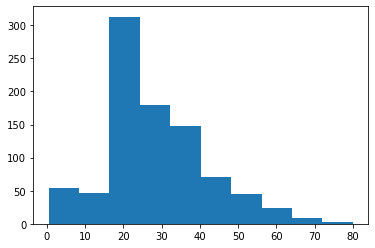

In [23]:
train_df["Age"].fillna(train_df.groupby("Pclass")["Age"].transform("median"), inplace=True)
#used transform inside of fillna function to change missing values of ages with median of total
plt.hist(train_df.Age, color = 'red')
#describing histogram of calculated data

## 8. 
Embarked column has some missing values. Impute it using the most frequent port name in the overall dataset.

In [35]:
train_df[train_df.Embarked.isnull()].Embarked
#used isnull function to get NaN values

61     NaN
829    NaN
Name: Embarked, dtype: object

In [40]:
cherbourg = train_df[(train_df.Embarked == 'C')].Embarked.count()
southampton = train_df[(train_df.Embarked == 'S')].Embarked.count()
queenstown = train_df[(train_df.Embarked == 'Q')].Embarked.count()
#estimate number of passengers for each port
dic = {c_embarked: 'Cherbourg',s_embarked: 'Queenstown',q_embarked: 'Southampton'}
print('Most passengers embarked from {} port and number of them were {}.'.format(dic[max(dic)], max(dic)))
#it turns out most of them embarked from Queenstown

In [41]:
train_df.loc[[61, 829], :] = 'Q'
#assign NaN values to most occured which is Q in our case
train_df[train_df.Embarked.isnull()].Embarked
#now there is not any NaN values

Series([], Name: Embarked, dtype: object)

## 9.
Passenger fare column is interesting column. Determine the passenger who has paid the highest fare. Determine wheather he/she survived.

In [24]:
print("Most paid Passenger's details are illustrated below(1 in the Survived section means True):")
train_df[train_df.Fare == train_df.Fare.max()].iloc[:,[3, 9, 1]]

Most paid Passenger's details are illustrated below(1 in the Survived section means True):


,Name,Fare,Survived
258,"Ward, Miss. Anna",512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1
737,"Lesurer, Mr. Gustave J",512.3292,1


## 10.
Determine the median fare for each passenger class. Inpute the missing fare values using these values. 

In [43]:
train_df[train_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## 11.
Drow a boxplot of passenger fares. Try to analyze and explain the boxplot.

As we can see from the second boxplot the median of the Fare column located between 10 and 30 which indicates that most of the passengers were people with the low economical level. In addition, it's obvious from the first plot that majority of people chose tickets with the price in between 80 - 190 and 220 - 260 euros. Furthermore, 1st plot captures ticket prices higher than 500 euros which were intended for high incomers.

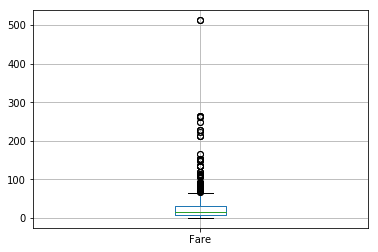

In [12]:
boxplot = train_df.boxplot(column=['Fare'])

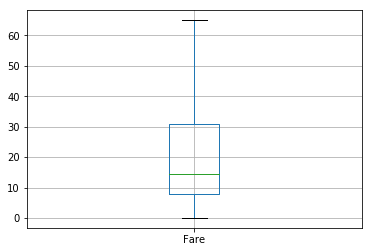

In [11]:
boxplot = train_df.boxplot(column=['Fare'], showfliers=False)

## 12.
Draw seperate boxplots of passenger fares for survivors and not survivors. Draw these two boxlots on the same figure.


{'whiskers': [<matplotlib.lines.Line2D at 0x132a0ac8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x132a0ade860>,
 'boxes': [<matplotlib.lines.Line2D at 0x132a0ac8a58>,
 'medians': [<matplotlib.lines.Line2D at 0x132a0aded68>,
 'fliers': [<matplotlib.lines.Line2D at 0x132a10f4518>,
 'means': []}

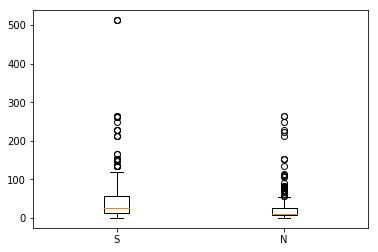

In [9]:
survived = train_df[train_df['Survived']==1]['Fare']
not_survived = train_df[train_df['Survived']==0]['Fare']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([survived,not_survived], labels=['S', 'N'])

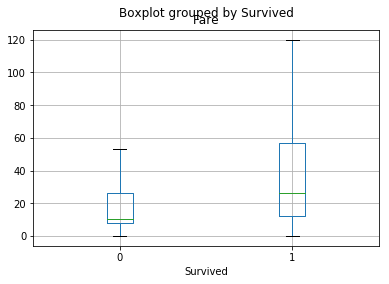

In [14]:
boxplot = train_df.boxplot(column=['Fare'], by='Survived', showfliers=False)

## 13.

Calculate the percentage of survivors amongst males.
Calculate the percentage of survivors amongst females.

In [11]:
total_m = train_df[(train_df.Sex == 'male')].Sex.count()
survived_m = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].Sex.count()
per_m_surv = round((survived_m / total_m) * 100, 2)

total_f = train_df[(train_df.Sex == 'female')].Sex.count()
survived_f = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].Sex.count()
per_f_surv = round((survived_f / total_f) * 100, 2)

print('Survived males percentage: {}, females: {}.'.format(per_m_surv, per_f_surv))

Survived males percentage: 18.89, females: 74.2.


## 14.
The title of the passengers contain valueable information as well. By looking at the Name column, determine the passengers with Colonel title.

In [12]:
test_df[test_df['Name'].str.contains('Sage')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


## 15.
Divide the Age column into five equal intervals. For example, passengers with age between 0 and 16, passengers with age between 16 and 32, and so on. Then determine the percentage of survivors for each age category. 

In [13]:
age16 = train_df[(train_df.Age >= 0 ) & (train_df.Age < 16)].Age.count()
age32 = train_df[(train_df.Age >= 16) & (train_df.Age < 32)].Age.count()
age48 = train_df[(train_df.Age >= 32) & (train_df.Age < 48)].Age.count()
age64 = train_df[(train_df.Age >= 48) & (train_df.Age < 64)].Age.count()
age80 = train_df[(train_df.Age >= 64) & (train_df.Age < 80)].Age.count()

s_age16 = train_df[(train_df.Age >= 0 ) & (train_df.Age < 16) & (train_df.Survived == 1)].Age.count()
s_age32 = train_df[(train_df.Age >= 16) & (train_df.Age < 32) & (train_df.Survived == 1)].Age.count()
s_age48 = train_df[(train_df.Age >= 32) & (train_df.Age < 48) & (train_df.Survived == 1)].Age.count()
s_age64 = train_df[(train_df.Age >= 48) & (train_df.Age < 64) & (train_df.Survived == 1)].Age.count()
s_age80 = train_df[(train_df.Age >= 64) & (train_df.Age <= 80) & (train_df.Survived == 1)].Age.count()

per_age16 = round((s_age16 / age16)*100, 2)
per_age32 = round((s_age32 / age32)*100, 2)
per_age48 = round((s_age48 / age48)*100, 2)
per_age64 = round((s_age64 / age64)*100, 2)
per_age80 = round((s_age80 / age80)*100, 2)

print("Percentage of survivors for 0-16, 16-32, 32-48, 48-64 and 64-80 ages are {}, {}, {}, {} and {} respectively.".
      format(per_age16, per_age32, per_age48, per_age64, per_age80))

Percentage of survivors for 0-16, 16-32, 32-48, 48-64 and 64-80 ages are 59.04, 33.13, 40.97, 47.37 and 8.33 respectively.


## 16.
Create a new column Family_Size which will hold the size of the family on the Titanic board for each passenger. You can calculate the family size by adding number of parents / children aboard the Titanic (Parch column) and number of siblings / spouses aboard the Titanic (Sibsp column). Determine the largest family and its members on the Titanic board.

In [14]:
newl = train_df.Parch + train_df.SibSp
train_df['Family_Size'] = newl
train_df

train_df[(train_df['Family_Size'] == train_df['Family_Size'].max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
159,160,0,3,"Sage, Master. Thomas Henry",male,24.0,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,24.0,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,24.0,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,24.0,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,24.0,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,24.0,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.55,NaN,S,10
